<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/9thWeekTasks/NN%20Model_House%20Price%20Data_Muhammad%20Raihan%20B_1103213077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 9 Neural Network

Dataset : housepricedata.csv

Dokumentasi ChatGPT : https://chatgpt.com/share/e0e04d94-1d80-4d00-a843-85b29ea8bff5

# IMPORT LIBRARY

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

# MOUNT GOOGLE DRIVE

In [19]:
# Menghubungkan Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [20]:
# Membaca file CSV dari Google Drive

# Membuat path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca file CSV
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# PREPROCESSING

In [21]:
# Memisahkan fitur dan target
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

In [22]:
# Normalisasi fitur [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Membagi data menjadi 70% untuk pelatihan dan 30% untuk validasi dan pengujian
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membagi data validasi dan pengujian menjadi 50% validasi dan 50% pengujian
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# MODELING

In [24]:
# Membuat model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Menyusun model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6810 - accuracy: 0.5411 - val_loss: 0.6788 - val_accuracy: 0.5388
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.5499 - val_loss: 0.6734 - val_accuracy: 0.5525
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.5577 - val_loss: 0.6681 - val_accuracy: 0.5616
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.6468 - val_loss: 0.6627 - val_accuracy: 0.5571
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.5900 - val_loss: 0.6574 - val_accuracy: 0.6256
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6526 - val_loss: 0.6520 - val_accuracy: 0.6438
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6869 - val_loss: 0.6463 - val_accuracy: 0.6804
Epoch 8/100


# VISUALISASI

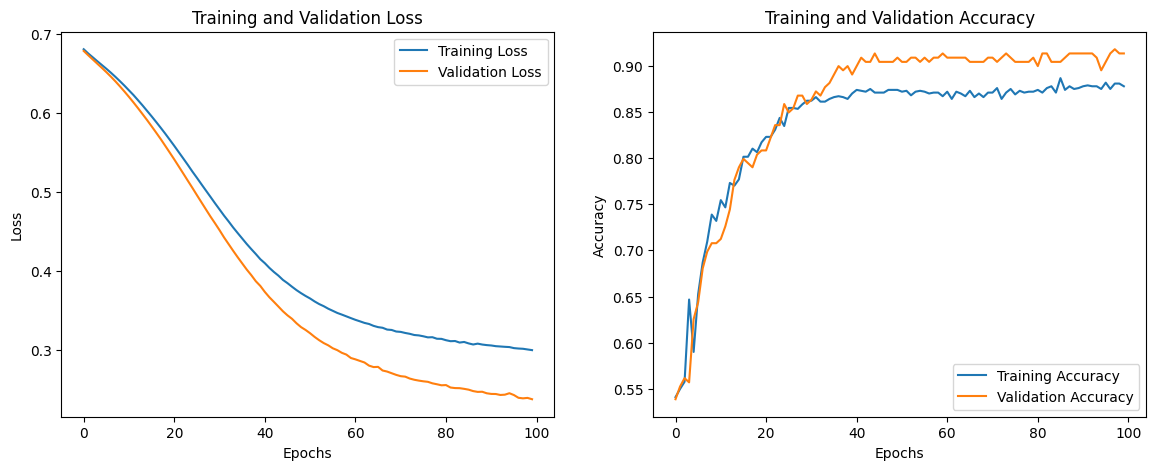

In [25]:
# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# EVALUASI MODEL

In [26]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9041
Test Loss: 0.252720445394516
Test Accuracy: 0.9041095972061157
